<a href="https://colab.research.google.com/github/crd3cc04/DS-Unit-2-Applied-Modeling/blob/master/Cortesha%20RosaRobinson/module1-define-ml-problems/_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [36]:
!pip install category_encoders==2.*
import numpy as np
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving heart-disease-dataset.zip to heart-disease-dataset.zip


In [5]:
!pwd

/content


In [6]:
!unzip heart-disease-dataset.zip
!ls

Archive:  heart-disease-dataset.zip
  inflating: Heart Disease Dataset.csv  
'Heart Disease Dataset.csv'   heart-disease-dataset.zip   sample_data


In [10]:
df = pd.read_csv('Heart Disease Dataset.csv')
df.head(100)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2,1


 ##### Choose your target. Which column in your tabular dataset will you predict?

In [13]:
df['thal'].describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

In [14]:
df['thal'].isnull().sum()

0

In [0]:
# I'm going to use the 'thal column because it is already set as a catagorical variable
# and I will be able to use the classificiation model  

##### Is your problem regression or classification?

In [0]:
# My problem is a classification; the variable in my target column is catergorical (or discrete)


#####  How is your target distributed?
*   Classification: How many classes? Are the classes imbalanced?
*   Regression: Is the target right-skewed? If so, you may want to log transform the target.

In [18]:
# Classification.....
y = df['thal']

y.nunique()

4

In [19]:
y.value_counts(normalize=True).max()

0.5478547854785478

#####  Choose your evaluation metric(s).


*   Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
*   Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?



In [20]:
# As you can see my majority class frequency is greater than 50%, allowing me to use a multi classifer or binary.....
y.value_counts(normalize=True)

2    0.547855
3    0.386139
1    0.059406
0    0.006601
Name: thal, dtype: float64

##### Choose which observations you will use to train, validate, and test your model.


*   Are some observations outliers? Will you exclude them?
*   Will you do a random split or a time-based split?



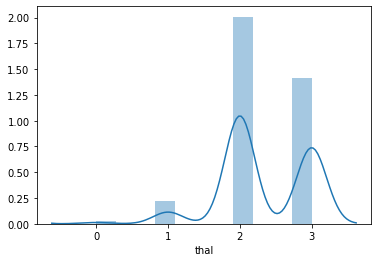

In [21]:
# I will use 'exang', 'thalach', 'fbs', 'trest', 'cp', 'sex', and 'age'
# I think all these observations will help in the determination of whether or not 
# an individual has the presence of heart disease

import seaborn as sns
sns.distplot(y);

In [22]:
y.describe()

count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

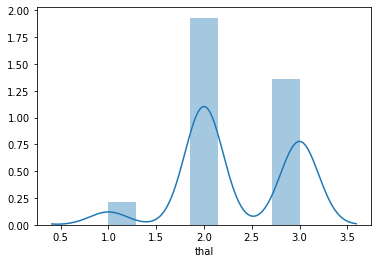

In [24]:
df = df[(df['thal'] >= np.percentile(df['thal'], 0.5)) & (df['thal'] <= np.percentile(df['thal'], 99.5))]

y = df['thal']

sns.distplot(y);

In [25]:
y.describe()

count    301.000000
mean       2.328904
std        0.584347
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64

#####  Begin to clean and explore your data.

In [27]:
df['thal'].nunique()

3

In [28]:
df['thal'].unique()

array([1, 2, 3])

In [26]:
df.isnull().sum().sort_values()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
# I will be doing a random split because my data does not have any date or time data associated with it.....
import pandas as pd
from sklearn.model_selection import train_test_split
 
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['thal'], random_state=42)

train.shape, test.shape

((240, 14), (61, 14))

##### Begin to choose which features, if any, to exclude. Would some features "leak" future information?

In [37]:
# First I will see if we have any leakage at all with a desicion tree model....Data shows that there is no leakage going on within the data
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

target = 'thal'
features = train.columns.drop([target])
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(max_depth=3)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.6885245901639344


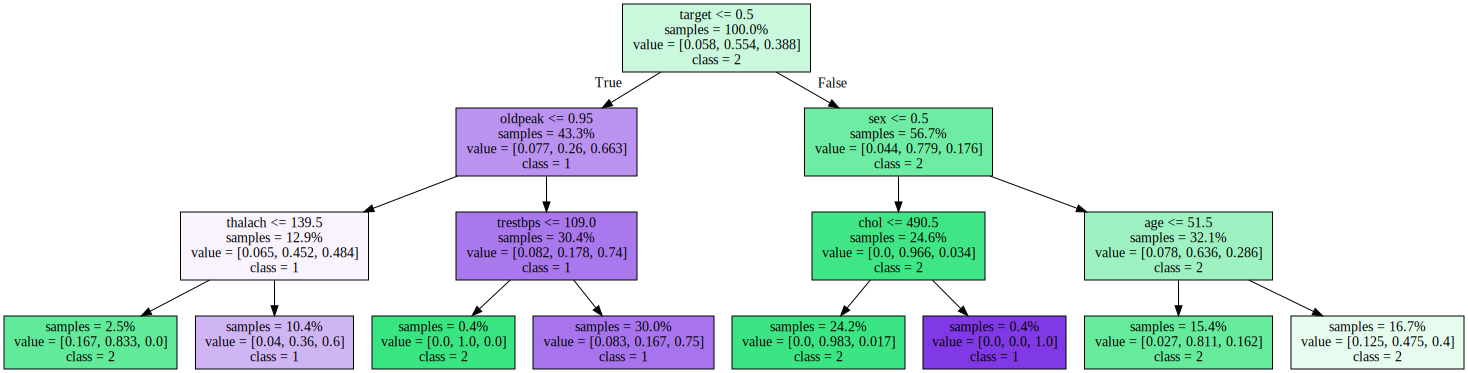

In [38]:
import graphviz
from sklearn.tree import export_graphviz

tree = pipeline.named_steps['decisiontreeclassifier']

dot_data = export_graphviz(
    tree, 
    out_file=None, 
    feature_names=X_train.columns, 
    class_names=y_train.unique().astype(str), 
    filled=True, 
    impurity=False,
    proportion=True
)

graphviz.Source(dot_data)